### Install dependencies

In [ ]:
!pip install -q \
"bertopic==0.17.0" \
"sentence-transformers" \
"pandas" \
"umap-learn==0.5.7" \
"hdbscan==0.8.40" \
"matplotlib" \
"wordcloud==1.9.4"

In [1]:
from bertopic import BERTopic
import pandas as pd
from sentence_transformers import SentenceTransformer

### Fit Topic Model

In [ ]:
# Define topic model
sentence_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
topic_model = BERTopic(embedding_model=sentence_model)

In [ ]:
### Read data
queries_df = pd.read_csv('queries.csv')
queries_list = queries_df["text"].astype(str).tolist()

In [ ]:
# Fit the model to user queries
topics, probs = topic_model.fit_transform(queries_list)

In [ ]:
# Automatically reduce the number of topic cluster by merging them 
topic_model._auto_reduce_topics(topic_model.get_document_info(queries_list))

In [ ]:
# save the model for later use
topic_model.save("topic_model", serialization="safetensors")

### Modelling Results

In [ ]:
topic_model.get_topics()                 # topic list

In [32]:
topic_model.get_topic(5)

[('flüchtlinge', 0.01306897705826551),
 ('migration', 0.011834912086884038),
 ('flüchtling', 0.010966136460623888),
 ('migrationshintergrund', 0.010663889851631903),
 ('refugee', 0.010518853206048558),
 ('immigration', 0.010147515029991921),
 ('migranten', 0.009167902835301433),
 ('migrant', 0.008472660645169779),
 ('flüchtlingskrise', 0.007349296557072976),
 ('zuwanderung', 0.007017138354918533)]

In [29]:
topic_model.get_topic_freq().head(10)             # topic frequencies

,Topic,Count
9,-1,36156
16,0,26682
26,1,22228
3,2,10673
10,3,7615
46,4,5841
99,5,5689
76,6,4828
18,7,4470
179,8,4312


In [27]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,36156,-1_second_geflüchteten_den_die,"[second, geflüchteten, den, die, spitzenkandid...",[deutsche version des penn state worry questio...
1,0,26682,0_eurobarometer_standard_91_95,"[eurobarometer, standard, 91, 95, special, fla...","[eurobarometer, eurobarometer, eb - standard a..."
2,1,22228,1_za7500_za3950_za5270_za5999,"[za7500, za3950, za5270, za5999, za5250, za480...","[za7500, za7500, za7500 ]"
3,2,10673,2_piaac_umwelt_asku_isei,"[piaac, umwelt, asku, isei, esa, rauchen, eink...","[piaac, piaac, piaac]"
4,3,7615,3_arbeitszufriedenheit_arbeitszeit_mitarbeiter...,"[arbeitszufriedenheit, arbeitszeit, mitarbeite...","[arbeitszufriedenheit, arbeitszufriedenheit , ..."
5,4,5841,4_rechtsextremismus_politikverdrossenheit_link...,"[rechtsextremismus, politikverdrossenheit, lin...","[rechts links, links-rechts, rechts links]"
6,5,5689,5_flüchtlinge_migration_flüchtling_migrationsh...,"[flüchtlinge, migration, flüchtling, migration...","[flüchtlinge, flüchtlinge, flüchtlinge]"
7,6,4828,6_umweltbewusstsein_nachhaltigkeit_umweltverha...,"[umweltbewusstsein, nachhaltigkeit, umweltverh...","[umweltbewusstsein, umweltbewusstsein, umweltb..."
8,7,4470,7_allbus_nutzt_cumulation_gesellschaftsform,"[allbus, nutzt, cumulation, gesellschaftsform,...","[allbus, allbus , allbus]"
9,8,4312,8_mediennutzung_medien_medienkompetenz_medienk...,"[mediennutzung, medien, medienkompetenz, medie...","[mediennutzung, mediennutzung, medienkompetenz..."


In [28]:
topic_model.get_document_info(queries_list).head(10)   # query information

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,zufriedenheit,24,24_lebenszufriedenheit_zufriedenheit_happiness...,"[lebenszufriedenheit, zufriedenheit, happiness...","[lebenszufriedenheit , lebenszufriedenheit, le...",lebenszufriedenheit - zufriedenheit - happines...,False
1,aes,163,163_aes_missy__,"[aes, missy, , , , , , , , ]","[aes, aes, aes]",aes - missy - - - - - - - -,True
2,aes,163,163_aes_missy__,"[aes, missy, , , , , , , , ]","[aes, aes, aes]",aes - missy - - - - - - - -,True
3,leo,675,675_leo_lern_lese_lerntyp,"[leo, lern, lese, lerntyp, leseliste, , , , , ]","[leo, leo, leo]",leo - lern - lese - lerntyp - leseliste - - ...,True
4,piaac,2,2_piaac_umwelt_asku_isei,"[piaac, umwelt, asku, isei, esa, rauchen, eink...","[piaac, piaac, piaac]",piaac - umwelt - asku - isei - esa - rauchen -...,True
5,leistung,129,129_vermögen_leistung_leistungsmotiv_leistungs...,"[vermögen, leistung, leistungsmotiv, leistungs...","[vermögen, vermögen, vermögen]",vermögen - leistung - leistungsmotiv - leistun...,False
6,skalen,191,191_skalen_bergbau_berg_steinkohle,"[skalen, bergbau, berg, steinkohle, pyramid, e...","[skalen, skalen, skalen]",skalen - bergbau - berg - steinkohle - pyramid...,True
7,skalen,191,191_skalen_bergbau_berg_steinkohle,"[skalen, bergbau, berg, steinkohle, pyramid, e...","[skalen, skalen, skalen]",skalen - bergbau - berg - steinkohle - pyramid...,True
8,fragebogen,73,73_fragebogen_fragebogengestaltung_fragebogene...,"[fragebogen, fragebogengestaltung, fragebogene...","[fragebogen, fragebogen, fragebogen]",fragebogen - fragebogengestaltung - fragebogen...,False
9,einkommen,2,2_piaac_umwelt_asku_isei,"[piaac, umwelt, asku, isei, esa, rauchen, eink...","[piaac, piaac, piaac]",piaac - umwelt - asku - isei - esa - rauchen -...,False


In [8]:
# Selected top-50 useful clusters/topics and named them
top50_topics = {3: 'work', 4: 'politics', 5: 'migration', 6: 'environment', 8: 'social media',
       9: 'corona', 13: 'social desirability', 16: 'gender', 17: 'digitization', 18: 'religion', 19: 'racism and Xenophobia',
       20: 'climate change', 22: 'social inequality', 24: 'satisfaction', 25: 'crime', 26: 'motivation',
       27: 'health', 30: 'violence and sexual abuse', 31: 'presse- und informationsamt', 32: 'sexuality', 34: 'stress', 35: 'education',
       36: 'trust', 37: 'self-efficacy', 38: 'youth', 41: 'family', 42: 'mental health', 43: 'abortion',
       44: 'generation z', 45: 'drugs', 46: 'child poverty and chilcare', 47: 'democracy', 50: 'security', 52: 'personality', 53: 'consumption',
       54: 'mobility', 56: 'leadership', 58: 'sport', 59: 'homeoffice', 61: 'discrimination', 63: 'culture', 64: 'alcohol',
       66: 'populism', 67: 'ukraine', 68: 'turkey', 70: 'work life balance', 71: 'conspiracy', 72: 'social work',
       74: 'depression', 78: 'technology'}

### Create WordCloud

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
topic_freq_df = topic_model.get_topic_freq().set_index('Topic')
topic_freq_df

,Count
Topic,
-1,36156
0,26682
1,22228
2,10673
3,7615
...,...
4610,10
4611,10
4612,10


In [17]:
topic_counts = {}

for topic_no, topic_name in top50_topics.items():
    topic_counts[topic_name] = topic_freq_df.loc[topic_no]['Count']

topic_counts

{'work': 7615,
 'politics': 5841,
 'migration': 5689,
 'environment': 4828,
 'social media': 4312,
 'corona': 3967,
 'social desirability': 3040,
 'gender': 2598,
 'digitization': 2582,
 'religion': 2527,
 'racism and Xenophobia': 2515,
 'climate change': 2438,
 'social inequality': 2216,
 'satisfaction': 2094,
 'crime': 2043,
 'motivation': 1932,
 'health': 1929,
 'violence and sexual abuse': 1780,
 'presse- und informationsamt': 1685,
 'sexuality': 1636,
 'stress': 1538,
 'education': 1524,
 'trust': 1467,
 'self-efficacy': 1412,
 'youth': 1408,
 'family': 1263,
 'mental health': 1257,
 'abortion': 1249,
 'generation z': 1242,
 'drugs': 1224,
 'child poverty and chilcare': 1203,
 'democracy': 1164,
 'security': 1030,
 'personality': 962,
 'consumption': 958,
 'mobility': 936,
 'leadership': 921,
 'sport': 893,
 'homeoffice': 884,
 'discrimination': 862,
 'culture': 842,
 'alcohol': 837,
 'populism': 822,
 'ukraine': 809,
 'turkey': 804,
 'work life balance': 761,
 'conspiracy': 752,


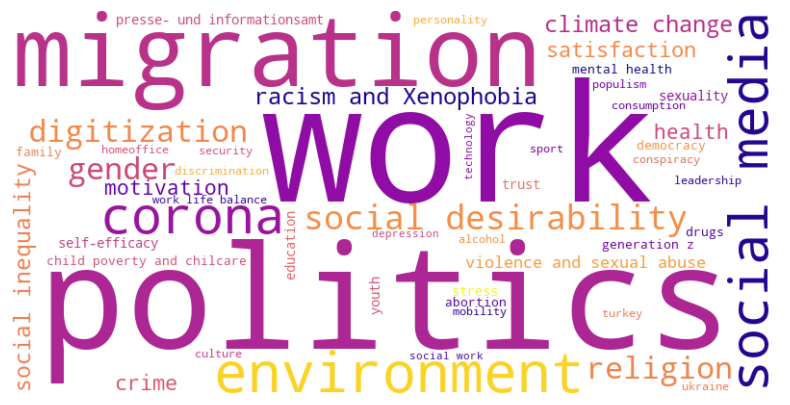

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(topic_counts)
wordcloud.to_file("top50_topics_wordcloud.png")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()